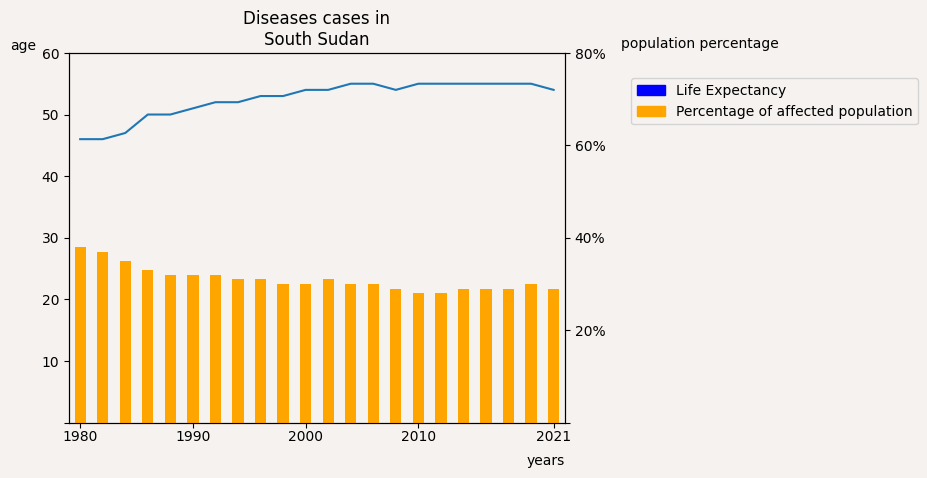

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from Diseases import CoutnCasesPercentage
from GiraVettori import rotate

f = open("/workspace/VS/DataSet/LifeExpGrosso.csv", "r")
lifeExp = []
line = f.readline()
elments = line.split(",")
graphColor = "#f6f2ef"
plt.figure(facecolor = graphColor)
plt.axes(facecolor = graphColor)
while line != "":
    if elments[0] == "South Sudan" and elments[1] == "2021":
        for j in range (0, 22, 1):
            lifeExp.append(int(float(elments[3])))
            line = f.readline()
            elments = line.split(",")
    else:
        line = f.readline()
        elments = line.split(",")
f.close()
years = []
for i in range (2000,2022,1):
    years.append(i)
cases = CoutnCasesPercentage()
cases = cases[66:88]
cases = rotate(cases)
lifeExp = rotate(lifeExp)


df = pd.DataFrame({'y1': lifeExp, 'y2': cases, 'years': years })

plt.title("Diseases cases in\nSouth Sudan")
plt.xlabel("\nyears", loc='right')

#y1
plt.ylim(0, 60)
plt.yticks([0, 10, 20, 30, 40, 50, 60], labels = ['', '10', '20', '30', '40', '50', '60'])
plt.ylabel("age", rotation='horizontal', loc = 'top')
df['y1'].plot(kind='line')

#y2
df['y2'].plot(kind='bar', color='orange', secondary_y=True)
plt.ylim(0, 80)
plt.text(31, 82, "population percentage", rotation='horizontal', ha='right', va='center')
plt.yticks([0, 20, 40, 60, 80], labels = ['', '20%', '40%', '60%', '80%'])

#x
plt.xticks(ticks= [0,5,10,15,21], labels = ['', '', '', '', ''])
plt.text(0, -4, "1980", rotation='horizontal', ha='center')
plt.text(5, -4, "1990", rotation='horizontal', ha='center')
plt.text(10, -4, "2000", rotation='horizontal', ha='center')
plt.text(15, -4, "2010", rotation='horizontal', ha='center')
plt.text(21, -4, "2021", rotation='horizontal', ha='center')

#legend
LE = mpatches.Patch(color='blue', label='Life Expectancy')
PP = mpatches.Patch(color='orange', label='Percentage of affected population')
plt.legend(handles=[LE, PP],ncol = 1, bbox_to_anchor=(1.12, 0.95), loc='upper left', facecolor = graphColor)
plt.show()
